In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lams = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lams, lngs)
lat_lngs

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | port-gentil
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | tuusula
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | miharu
Processing Record 15 of Set 1 | lavrentiya
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | leh
Processing Record 18 of Set 1 | puri
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | marquette
Processing Record 22 of Set 1 | bambous virieux
Processing Record 23 of Set 1 | stephenville
Pr

Processing Record 37 of Set 4 | tandil
Processing Record 38 of Set 4 | nurota
Processing Record 39 of Set 4 | rosarito
Processing Record 40 of Set 4 | bluff
Processing Record 41 of Set 4 | tura
Processing Record 42 of Set 4 | kupang
Processing Record 43 of Set 4 | mehamn
Processing Record 44 of Set 4 | el salto
Processing Record 45 of Set 4 | ancud
Processing Record 46 of Set 4 | sosua
Processing Record 47 of Set 4 | sao gabriel da cachoeira
Processing Record 48 of Set 4 | tautira
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | sembe
Processing Record 1 of Set 5 | sur
Processing Record 2 of Set 5 | novyy urengoy
Processing Record 3 of Set 5 | broken hill
Processing Record 4 of Set 5 | senanga
Processing Record 5 of Set 5 | arawa
Processing Record 6 of Set 5 | nuevo progreso
Processing Record 7 of Set 5 | aswan
Processing Record 8 of Set 5 | khatanga
Processing Record 9 of Set 5 | altay
Processing Record 10 of Set 5 | tokat
Processing Record 11 of Set 5 | 

Processing Record 34 of Set 8 | el dorado
Processing Record 35 of Set 8 | morant bay
Processing Record 36 of Set 8 | westlock
Processing Record 37 of Set 8 | hay river
Processing Record 38 of Set 8 | provideniya
Processing Record 39 of Set 8 | samarai
Processing Record 40 of Set 8 | salinopolis
Processing Record 41 of Set 8 | namibe
Processing Record 42 of Set 8 | brewster
Processing Record 43 of Set 8 | selma
Processing Record 44 of Set 8 | kuju
Processing Record 45 of Set 8 | we
City not found. Skipping...
Processing Record 46 of Set 8 | mozarlandia
Processing Record 47 of Set 8 | gubkinskiy
Processing Record 48 of Set 8 | kendari
Processing Record 49 of Set 8 | lamphun
Processing Record 50 of Set 8 | dunkwa
Processing Record 1 of Set 9 | innoshima
Processing Record 2 of Set 9 | khash
Processing Record 3 of Set 9 | maarianhamina
Processing Record 4 of Set 9 | chipaque
Processing Record 5 of Set 9 | warrnambool
Processing Record 6 of Set 9 | cockburn town
Processing Record 7 of Set 9 

Processing Record 23 of Set 12 | halberstadt
Processing Record 24 of Set 12 | sovetskiy
Processing Record 25 of Set 12 | faanui
Processing Record 26 of Set 12 | kpandae
Processing Record 27 of Set 12 | palana
Processing Record 28 of Set 12 | mizpe ramon
City not found. Skipping...
Processing Record 29 of Set 12 | bontang
Processing Record 30 of Set 12 | praia da vitoria
Processing Record 31 of Set 12 | caravelas
Processing Record 32 of Set 12 | suntar
Processing Record 33 of Set 12 | weyburn
Processing Record 34 of Set 12 | kenai
Processing Record 35 of Set 12 | gambo
Processing Record 36 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 37 of Set 12 | sojat
Processing Record 38 of Set 12 | worland
Processing Record 39 of Set 12 | meyungs
City not found. Skipping...
Processing Record 40 of Set 12 | monroe
Processing Record 41 of Set 12 | tomatlan
Processing Record 42 of Set 12 | porto feliz
Processing Record 43 of Set 12 | tessalit
Processing Record 44 of Set 12 | muri

In [6]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Touros,-5.20,-35.46,82.40,74,40,10.29,BR,2020-11-23 12:20:23
1,Jamestown,42.10,-79.24,36.00,91,75,8.05,US,2020-11-23 12:16:31
2,Port-Gentil,-0.72,8.78,84.20,79,40,10.29,GA,2020-11-23 12:19:31
3,Yellowknife,62.46,-114.35,6.80,84,90,14.99,CA,2020-11-23 12:20:12
4,Rikitea,-23.12,-134.97,72.93,73,98,6.42,PF,2020-11-23 12:19:55
5,Katsuura,35.13,140.30,59.00,72,75,10.29,JP,2020-11-23 12:19:56
6,Carnarvon,-24.87,113.63,78.80,69,0,10.29,AU,2020-11-23 12:20:34
7,Hermanus,-34.42,19.23,64.99,68,98,11.01,ZA,2020-11-23 12:20:02
8,Hilo,19.73,-155.09,75.20,88,90,10.29,US,2020-11-23 12:16:39
9,Mar Del Plata,-38.00,-57.56,66.00,88,75,5.82,AR,2020-11-23 12:20:16


In [8]:
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

new_col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_col_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Touros,BR,2020-11-23 12:20:23,-5.20,-35.46,82.40,74,40,10.29
1,Jamestown,US,2020-11-23 12:16:31,42.10,-79.24,36.00,91,75,8.05
2,Port-Gentil,GA,2020-11-23 12:19:31,-0.72,8.78,84.20,79,40,10.29
3,Yellowknife,CA,2020-11-23 12:20:12,62.46,-114.35,6.80,84,90,14.99
4,Rikitea,PF,2020-11-23 12:19:55,-23.12,-134.97,72.93,73,98,6.42
...,...,...,...,...,...,...,...,...,...
572,Westport,US,2020-11-23 12:28:49,41.14,-73.36,57.99,100,90,3.36
573,Husavik,IS,2020-11-23 12:20:31,66.04,-17.34,12.20,92,0,3.36
574,Marsa Matruh,EG,2020-11-23 12:28:49,31.35,27.25,69.80,56,75,9.17
575,Lagdo,CM,2020-11-23 12:28:49,9.05,13.73,98.60,19,0,4.70


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

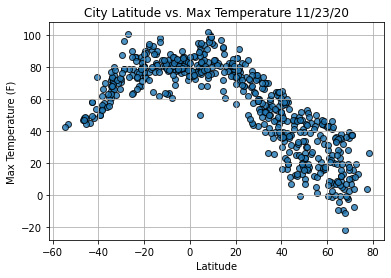

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Max_temps.png")

# Show plot.
plt.show()

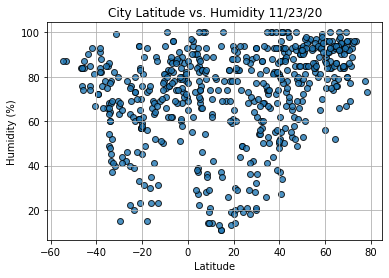

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Humidity.png")
# Show plot.
plt.show()

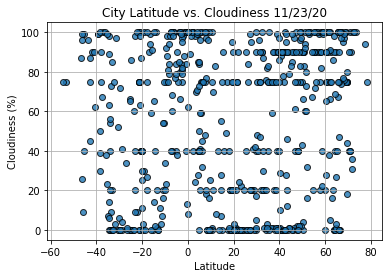

In [13]:
# Build the scatter plots for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Cloudiness.png")
# Show plot.
plt.show()

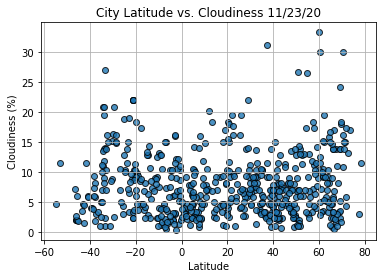

In [14]:
# Build the scatter plots for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/wind_speed.png")
# Show plot.
plt.show()